<a href="https://colab.research.google.com/github/Beta628427/Tesis/blob/master/2_Beta___Cod/Beta_PCA/PCA_Cod_master_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODIGO MASTER PCA _ BETA

## En escodigo encontraremos PCA aplicado a los datos mmc3

__ Versión 1.0 __

In [1]:
pip install mglearn

In [0]:
import gspread, sklearn, mglearn, time, pandas as pd, numpy as np, scipy as sc
import matplotlib.pyplot as plt
from oauth2client.client import GoogleCredentials
from google.colab import auth
from sklearn.decomposition import PCA
from IPython.display import clear_output

# Autoriza Drive_BETA
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

## Abro <mmc3> y me ubico en "Joint Rotations"

In [0]:
sh            = gc.open('mmc3')                   # Abro documento 
worksheet     = sh.worksheet("Joint Rotations")   # Entro a la pestaña de Excel
rows          = worksheet.get_all_values()        # Saco todos los valores
df            = pd.DataFrame.from_records(rows)   # Guardo en una tabla panda

In [4]:
pd.DataFrame(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,Angle [°],% Gait Cycle,Natural,,,XS,,,S,,,M,,,L,,,Toe,,,Heel,,,Ascending,,,Descending,,,Natural,,,XS,,,S,,,M,,,L,,,Toe,,,Heel,,,Ascending,,,Descending,,
1,Pelvic Ant/Posterior Tilt,0,-7.28,-2.8,1.6,-7.2,-3.7,-0.2,-7.1,-2.6,1.9,-8.2,-3.6,1.0,-9.4,-4.4,0.5,-10.9,-6.5,-2.1,-12.4,-7.9,-3.4,-8.1,-3.3,1.6,-7.0,-2.4,2.2,-16.4,-9.3,-2.3,-15.7,-9.4,-3.1,-16.9,-9.1,-1.2,-14.6,-8.8,-3.0,-17.3,-12.8,-8.3,-19.0,-12.9,-6.7,-21.4,-14.7,-8.0,-18.0,-11.7,-5.4,-15.9,-9.2,-2.5
2,Pelvic Ant/Posterior Tilt,1,-7.2,-2.8,1.6,-7.2,-3.7,-0.3,-7.0,-2.6,1.8,-8.2,-3.6,1.0,-9.2,-4.4,0.5,-10.8,-6.4,-2.1,-12.3,-7.8,-3.3,-8.5,-3.7,1.1,-7.1,-2.6,1.9,-16.4,-9.4,-2.4,-15.9,-9.5,-3.2,-16.9,-9.1,-1.2,-14.7,-8.9,-3.0,-17.3,-12.8,-8.3,-19.0,-12.8,-6.7,-21.3,-14.6,-8.0,-18.3,-12.0,-5.7,-15.9,-9.2,-2.5
3,Pelvic Ant/Posterior Tilt,2,-7.2,-2.8,1.6,-7.2,-3.8,-0.4,-7.0,-2.6,1.8,-8.2,-3.5,1.1,-9.2,-4.3,0.5,-10.6,-6.3,-2.1,-12.2,-7.7,-3.2,-8.9,-4.1,0.6,-7.3,-2.8,1.7,-16.5,-9.5,-2.5,-16.1,-9.7,-3.3,-17.0,-9.2,-1.3,-14.8,-9.0,-3.2,-17.3,-12.9,-8.5,-18.9,-12.8,-6.8,-21.3,-14.7,-8.1,-18.6,-12.3,-6.0,-16.0,-9.3,-2.6
4,Pelvic Ant/Posterior Tilt,3,-7.2,-2.7,1.7,-7.2,-3.8,-0.4,-7.0,-2.6,1.8,-8.1,-3.5,1.2,-9.1,-4.3,0.6,-10.5,-6.3,-2.0,-12.2,-7.7,-3.2,-9.3,-4.6,0.0,-7.4,-2.9,1.6,-16.7,-9.6,-2.6,-16.3,-9.8,-3.4,-17.1,-9.2,-1.4,-15.0,-9.1,-3.3,-17.4,-13.1,-8.8,-18.8,-12.9,-6.9,-21.4,-14.8,-8.3,-19.0,-12.7,-6.4,-16.1,-9.4,-2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,Foot Int/External Rotation,96,-21.1,-13.4,-5.7,-18.6,-12.5,-6.3,-22.7,-14.1,-5.4,-19.8,-12.4,-5.0,-20.8,-12.2,-3.5,-13.6,-7.0,-0.4,-22.7,-14.7,-6.8,-21.0,-12.9,-4.8,-24.4,-12.4,-0.5,-19.8,-12.9,-6.0,-18.9,-12.3,-5.6,-20.2,-13.5,-6.9,-19.7,-13.1,-6.5,-17.2,-11.9,-6.5,-9.8,-4.0,1.9,-20.8,-14.7,-8.6,-21.4,-14.4,-7.3,-20.1,-13.2,-6.4
1411,Foot Int/External Rotation,97,-20.7,-13.1,-5.6,-18.5,-12.3,-6.1,-22.3,-13.9,-5.5,-19.4,-12.1,-4.9,-20.2,-11.8,-3.3,-13.5,-6.8,-0.2,-22.6,-14.6,-6.5,-20.1,-11.6,-3.1,-23.9,-11.6,0.6,-19.4,-12.6,-5.8,-18.9,-12.2,-5.4,-19.9,-13.2,-6.5,-19.1,-12.8,-6.4,-16.7,-11.3,-5.8,-9.4,-3.7,2.1,-20.5,-14.5,-8.4,-20.3,-13.2,-6.1,-19.5,-12.7,-5.9
1412,Foot Int/External Rotation,98,-20.1,-12.9,-5.7,-18.3,-12.0,-5.8,-21.6,-13.6,-5.5,-18.9,-11.9,-4.9,-19.6,-11.4,-3.2,-13.6,-6.9,-0.1,-22.4,-14.3,-6.2,-19.4,-10.6,-1.8,-23.5,-11.0,1.6,-19.0,-12.3,-5.6,-18.8,-12.0,-5.2,-19.4,-12.8,-6.2,-18.5,-12.4,-6.2,-16.4,-10.7,-4.9,-9.0,-3.4,2.3,-20.2,-14.1,-8.1,-19.4,-12.2,-5.0,-19.0,-12.2,-5.4
1413,Foot Int/External Rotation,99,-19.4,-12.5,-5.6,-18.0,-11.6,-5.3,-21.0,-13.1,-5.3,-18.3,-11.6,-4.9,-18.9,-11.0,-3.2,-13.9,-7.0,-0.1,-22.2,-14.1,-6.0,-18.9,-9.8,-0.7,-23.3,-10.5,2.3,-18.4,-11.8,-5.3,-18.5,-11.7,-4.9,-18.8,-12.3,-5.8,-17.8,-11.9,-6.0,-16.1,-10.1,-4.1,-8.7,-3.2,2.4,-19.7,-13.8,-7.9,-18.9,-11.5,-4.2,-18.6,-11.9,-5.1


## Función de realizar numeros aleatorios con una media y una desviacion estandar especifica


In [0]:
# PROCESO DE GENERAR NUMEROS ALEATORIOS CON PROMEDIO Y DESVIACION ESTANDAR 
# DESEADOS
#···············································································
num_samples     = 20     # Numero de numeros aleatorios a generar
desired_mean    = -2.8   # promedio de numeros aleatorios
desired_std_dev = 8.9    # Desviacion estandar a numeros aleatorios a generar
#···············································································
# Funcion de variables aleatorias con media y desviacion estandar
def var_alea (num_samples,desired_mean,desired_std_dev):
  samples = np.random.normal(loc=0.0, scale=desired_std_dev, size=num_samples)
  actual_mean = np.mean(samples)
  actual_std = np.std(samples)
  #print("Initial samples stats   : mean = {:.4f} stdv = {:.4f}".
  #      format(actual_mean, actual_std))
  zero_mean_samples = samples - (actual_mean)
  zero_mean_mean = np.mean(zero_mean_samples)
  zero_mean_std = np.std(zero_mean_samples)
  #print("True zero samples stats : mean = {:.4f} stdv = {:.4f}".
  #      format(zero_mean_mean, zero_mean_std))
  scaled_samples = zero_mean_samples * (desired_std_dev/zero_mean_std)
  scaled_mean = np.mean(scaled_samples)
  scaled_std = np.std(scaled_samples)
  #print("Scaled samples stats    : mean = {:.4f} stdv = {:.4f}".
  #      format(scaled_mean, scaled_std))
  final_samples = scaled_samples + desired_mean
  final_mean = np.mean(final_samples)
  final_std = np.std(final_samples)
  #print("Final samples stats     : mean = {:.4f} stdv = {:.4f}".
  #      format(final_mean, final_std))
  #print(final_samples)
  return(final_samples)

### ¡Aquí! vuelvo una tabla en 20 tablas que almacena las variables tanto de jovenes como las de viejos de los targets < "Natural","XS","S","M","L","Toe","Heel","Ascending","Descending" > con media y desviacion dada:

#### 1) la media es el valor medio de cada target
#### 2) la desviacion estandar es la suma de los valores absolutos de la desviacion estandar positima mas la negativa.

#### Nota····································································
#### solo salieron 25 lineas de codigo XD solo que para que se vea mas bonito consume mas lineas 

\\(·w·)/


In [0]:
# Seleccionando de la sheet "Joint Rotations"
# ······· Pelvic_Ant_Posterior_Tilt
f_1 = 1   # fila de inicio Pelvic_Ant_Posterior_Tilt
f_2 = 102 # final final    Pelvic_Ant_Posterior_Tilt
targets         = df.iloc[0,:]
targets         = pd.DataFrame(targets[np.newaxis,:])
ta              = pd.DataFrame(np.array(df.iloc[f_1:f_2,:]))
tabla           = pd.DataFrame(ta)
target_colum = ['Angle [°]', '% Gait Cycle', 
                'joven_Natural-',   'joven_Natural',   'joven_Natural+', 
                'joven_XS-',        'joven_XS',        'joven_XS+', 
                'joven_S-',         'joven_S',         'joven_S+', 
                'joven_M-',         'joven_M',         'joven_M+', 
                'joven_L-',         'joven_L',         'joven_L+', 
                'joven_Toe-',       'joven_Toe',       'joven_Toe+', 
                'joven_Heel-',      'joven_Heel',      'joven_Heel+', 
                'joven_Ascending-', 'joven_Ascending', 'joven_Ascending+', 
                'joven_Descending-','joven_Descending','joven_Descending+',
                'viejo_Natural-',   'viejo_Natural',   'viejo_Natural+', 
                'viejo_XS-',        'viejo_XS',        'viejo_XS+', 
                'viejo_S-',         'viejo_S',         'viejo_S+', 
                'viejo_M-',         'viejo_M',         'viejo_M+', 
                'viejo_L-',         'viejo_L',         'viejo_L+', 
                'viejo_Toe-',       'viejo_Toe',       'viejo_Toe+', 
                'viejo_Heel-',      'viejo_Heel',      'viejo_Heel+', 
                'viejo_Ascending-', 'viejo_Ascending', 'viejo_Ascending+', 
                'viejo_Descending-','viejo_Descending','viejo_Descending+']
tabla.columns = target_colum # Agregarle targets a las columnas de tabla
#···············································································
# Variables diccionario de las tablas de 20 personas para jovenes y adultas
per = [""   ,"p1" ,"p2" ,"p3" ,"p4" ,"p5" ,"p6" ,"p7" ,"p8" ,"p9" ,"p10",
       "p11","p12","p13","p14","p15","p16","p17","p18","p19","p20"]
personas= {per[1]:[] ,per[2]:[] ,per[3]:[] ,per[4]:[] ,per[5] :[],
           per[6]:[] ,per[7]:[] ,per[8]:[] ,per[9]:[] ,per[10]:[],
           per[11]:[],per[12]:[],per[13]:[],per[14]:[],per[15]:[],
           per[16]:[],per[17]:[],per[18]:[],per[19]:[],per[20]:[]}
target_colum_ = ['% Gait Cycle','joven_Natural','joven_XS',
                 'joven_S','joven_M','joven_L','joven_Toe','joven_Heel', 
                 'joven_Ascending','joven_Descending','viejo_Natural',
                 'viejo_XS','viejo_S','viejo_M','viejo_L','viejo_Toe',
                 'viejo_Heel','viejo_Ascending','viejo_Descending']
for i in range(1,21):
  personas[per[i]] = pd.DataFrame(np.zeros((101,19)))
  personas[per[i]].columns = target_colum_
#···············································································
# Lleno las distinatas tablas de personas
j_v = ["joven","viejo"]
tag = ["Natural","XS","S","M","L","Toe","Heel","Ascending","Descending"]
# Armar el tag
for _j_v in j_v:
  for _tag in tag:
    vari = _j_v+"_"+_tag
    for i in range(tabla[vari].shape[0]):
      mean = tabla[vari][i]
      _mas = tabla[vari+"+"][i]
      _men = tabla[vari+"-"][i]
      DE   = abs(float(_mas))+abs(float(_men))
      NP   = pd.DataFrame(per).shape[0]-1 # numero de personas
      num_gener = var_alea(NP,float(mean),DE) # genero los numeros aleatorios
      # Comprovamos valores demedia y desviacion estandar
      media = np.mean(num_gener)
      DEE = np.std(num_gener)
      # Ploteo info
      #print("··············································· "+
      #      "i = "+str(i)+" / "+str(vari)+
      #      " ···············································"+"\n"+
      #      "media = "+str(mean)+" / DE+ = "+str(_mas)+" / DE- = "+str(_men)+
      #      " / DE total = "+str(DE)+"\n"+
      #      "···············································"+"\n"+
      #      "media = "+str(media)+" / DE total = "+str(DEE)+"\n"+
      #      "···············································"+
      #      "\n"+str(num_gener))
      # Lleno datos a las diferentes tablas de las 20 personas
      for _per in range(1,pd.DataFrame(per).shape[0]):
        #print("vari = "+str(vari))
        #print("Lista la persona = "+per[_per])
        personas[per[_per]][vari][i] = num_gener[_per-1]

### Comprobacion de valores
#### Replicaremos la tabla de mmc3 con el fin de verificar que sea los mismos valores de promedio y desviacion estandar positivo como negativo 


In [7]:
# Hallamos la media de un valor con coordenadas (n,m) para todas las personas
valores = []
for _per in range(1,pd.DataFrame(per).shape[0]):
  valores.append(personas[per[_per]]['joven_Natural'][0]) 
  print(str(personas[per[_per]][target_colum_[1]][0])+"    "+str(media))
media = np.mean(valores)
DEE   = np.std(valores)
print("\nmedia = " + str(media))
print("DEE = " + str(DEE))

-6.234766384030937    -9.999999999999998
-11.092479353988086    -9.999999999999998
8.212380025704718    -9.999999999999998
-2.0709064480120065    -9.999999999999998
13.765624244028956    -9.999999999999998
-3.6909449059894057    -9.999999999999998
-12.851545685746082    -9.999999999999998
12.003754845562497    -9.999999999999998
6.672381925701665    -9.999999999999998
-11.179486847536587    -9.999999999999998
-2.323785607619002    -9.999999999999998
-2.235547351528725    -9.999999999999998
-5.805908118546114    -9.999999999999998
-11.805435263225807    -9.999999999999998
-17.289160252704196    -9.999999999999998
-7.06407657874928    -9.999999999999998
8.345418449748092    -9.999999999999998
-14.530800200975605    -9.999999999999998
1.9406029316279136    -9.999999999999998
1.2346805762779898    -9.999999999999998

media = -2.8
DEE = 8.88


### PLOTEO EL DICCIONARIO DE PERSONAS <Pelvic Ant/Posterior Tilt>:
#### 1) Este diccionario tiene almacenadas los datos de las 20 personas
#### 2) Por personas hay datos de jovenes y adultos de los difernetes targets

In [8]:
personas

{'p1':      % Gait Cycle  joven_Natural  ...  viejo_Ascending  viejo_Descending
 0             0.0      -6.234766  ...        15.904311          2.663664
 1             0.0     -14.289392  ...       -24.514341          4.301902
 2             0.0     -12.104796  ...       -12.162156          5.801225
 3             0.0       5.904043  ...        -6.517754         31.008593
 4             0.0       1.478533  ...       -28.204209        -16.235392
 ..            ...            ...  ...              ...               ...
 96            0.0     -20.801918  ...        30.439944         -4.307038
 97            0.0       9.470609  ...        -9.221317         -1.883966
 98            0.0      -5.343662  ...       -40.556513         12.826247
 99            0.0      -5.457189  ...        27.882858        -26.740452
 100           0.0     -12.125976  ...       -15.377556        -21.647152
 
 [101 rows x 19 columns],
 'p10':      % Gait Cycle  joven_Natural  ...  viejo_Ascending  viejo_Descendi

In [9]:
pd.DataFrame(personas["p1"])

,% Gait Cycle,joven_Natural,joven_XS,joven_S,joven_M,joven_L,joven_Toe,joven_Heel,joven_Ascending,joven_Descending,viejo_Natural,viejo_XS,viejo_S,viejo_M,viejo_L,viejo_Toe,viejo_Heel,viejo_Ascending,viejo_Descending
0,0.0,-6.234766,5.383258,-6.189987,-11.868297,4.485565,11.207589,-33.354972,11.575692,9.233813,-1.124756,-10.665992,13.283857,-41.814977,-17.673746,2.270277,-8.522422,15.904311,2.663664
1,0.0,-14.289392,-15.215244,12.200703,-12.079445,12.258593,4.750282,-27.258137,0.008391,11.158271,-12.952236,-22.509920,12.788735,8.740180,-58.168107,30.677029,-39.508260,-24.514341,4.301902
2,0.0,-12.104796,-19.818658,-7.552198,1.992606,-4.581273,12.061672,-0.175706,-6.320228,0.002045,-11.663882,0.267835,-0.761240,7.918967,-30.460523,-8.300502,6.514012,-12.162156,5.801225
3,0.0,5.904043,7.577705,11.193312,-14.373581,1.389114,-1.175077,24.393418,8.739358,-5.310694,34.231301,25.640415,-39.393092,-8.093987,-25.257672,-12.613830,4.802988,-6.517754,31.008593
4,0.0,1.478533,-7.688298,12.340747,-0.820899,-7.436306,-26.132368,-1.795544,-3.146246,-8.408695,-16.628508,-23.668234,-15.978285,20.727871,1.714477,69.207750,-5.900518,-28.204209,-16.235392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,-20.801918,-7.446052,9.275553,-2.110843,-9.818357,-14.926301,1.548130,-12.264297,4.030976,6.029704,-30.932409,-6.106541,-17.634923,-0.945361,-24.987903,1.531022,30.439944,-4.307038
97,0.0,9.470609,-7.749020,-5.043102,-14.322134,-0.231806,-21.825097,6.486224,21.427113,3.882375,0.906020,-10.279565,-11.579532,-7.371197,-20.681598,-5.878639,-6.075826,-9.221317,-1.883966
98,0.0,-5.343662,-0.439755,-6.254119,12.115204,-17.230074,11.520411,-28.663405,8.388270,-25.236847,-2.200952,4.070655,-21.323428,-11.292496,-23.160068,-25.397854,-5.556727,-40.556513,12.826247
99,0.0,-5.457189,-0.022354,3.944049,4.313409,-3.605512,12.030696,-32.858858,-29.276963,-4.008964,16.060099,21.606623,-32.745675,0.084763,-53.374999,-24.191281,-11.607177,27.882858,-26.740452


In [10]:
pd.DataFrame(personas["p10"])

,% Gait Cycle,joven_Natural,joven_XS,joven_S,joven_M,joven_L,joven_Toe,joven_Heel,joven_Ascending,joven_Descending,viejo_Natural,viejo_XS,viejo_S,viejo_M,viejo_L,viejo_Toe,viejo_Heel,viejo_Ascending,viejo_Descending
0,0.0,-11.179487,4.729452,-0.016185,0.117654,5.699253,-26.401356,-7.462947,1.108049,-6.116912,25.527269,-2.880795,-10.379412,-0.594565,-7.692369,-84.569871,-38.949848,-64.370434,0.141606
1,0.0,1.498046,2.276708,-4.620475,-12.692414,-20.337693,-3.449728,-21.893407,-4.568038,5.274814,-29.978267,-11.359723,-17.241418,-21.105094,-24.822514,-46.170522,-24.276074,-63.806944,19.737409
2,0.0,-9.048730,3.443637,-8.685218,-2.807530,3.983557,6.029060,34.146655,16.657111,3.819626,10.516339,-48.254753,-3.284703,-11.072134,-11.349581,22.787859,-9.568448,-0.646510,-38.048400
3,0.0,6.693089,-11.619783,-16.617427,-18.099475,-6.383840,-24.307859,-19.875547,8.745577,-5.697213,-23.175446,12.799956,-17.049314,16.884036,26.393737,-70.961664,-41.837872,41.409642,-10.440631
4,0.0,-6.463895,-1.031480,-9.880465,9.549534,-1.547193,-5.714946,-13.285137,5.013768,5.416199,-5.652405,-9.576845,-9.989568,-19.428916,-41.546257,-2.432412,-46.586842,15.701920,-32.655921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,-5.011040,-11.850748,-12.972426,-15.738906,-13.731156,-22.681936,-3.412291,-14.955610,-2.742821,-40.447699,15.606991,-38.090042,15.774925,6.989674,-18.295615,-26.527512,-33.055864,-26.122152
97,0.0,8.621062,2.368908,5.201334,-16.873759,0.314668,-5.813668,11.711185,-18.480953,-7.364014,12.053221,-40.952605,-10.364821,-23.370258,-61.529979,3.244289,-11.328906,6.706438,-19.344628
98,0.0,-13.100937,-24.036923,-11.256752,-11.735887,-26.213269,-33.702680,-29.236087,-15.902428,2.266122,11.796716,-9.373895,-16.074673,-1.041808,-8.591894,-42.234824,40.677562,-29.220379,-43.324904
99,0.0,-18.809697,-14.701267,17.919036,-20.608122,-13.190404,-20.702104,-10.021612,-38.464049,-3.800750,1.366175,-40.634118,6.531356,17.356008,-33.067572,-57.869557,-73.409869,-14.417157,-13.296096


In [11]:
pd.DataFrame(personas["p20"])

,% Gait Cycle,joven_Natural,joven_XS,joven_S,joven_M,joven_L,joven_Toe,joven_Heel,joven_Ascending,joven_Descending,viejo_Natural,viejo_XS,viejo_S,viejo_M,viejo_L,viejo_Toe,viejo_Heel,viejo_Ascending,viejo_Descending
0,0.0,1.234681,0.546576,6.502638,12.693897,-1.478409,-1.707328,-5.308627,2.930132,1.254521,11.121712,30.140992,-3.917219,-27.031395,19.807689,-40.671795,13.359107,-9.794548,-17.883841
1,0.0,4.055691,12.797569,-2.652457,-2.866321,5.349380,-4.691715,-22.621834,11.392817,4.794989,-12.955088,5.885901,-23.366168,6.402637,7.875812,0.200993,-18.512834,-37.770716,-30.478734
2,0.0,3.382210,-8.130281,-7.859847,-13.345405,-4.852760,-4.665253,4.297215,-19.718928,-7.764719,0.870739,-58.926969,21.112149,23.815025,-3.048976,-47.858771,-21.264507,38.117221,-4.187632
3,0.0,-0.076456,-6.458150,3.936899,-0.704708,-17.024832,-10.217110,-18.273536,-22.291619,-5.820124,-23.963339,8.916577,27.350854,-20.166702,19.392914,-29.837505,-47.546873,-5.304141,-18.935396
4,0.0,3.520129,-1.619582,-8.819499,-10.536165,-10.669229,4.294373,23.223863,-6.611345,-11.128744,-26.653130,27.034542,2.716088,-25.334704,8.300751,-18.878584,-57.849115,-20.431607,13.122901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,-13.355603,-5.816146,4.158902,2.306080,-14.337003,-16.637444,-40.974410,-33.646521,-27.678919,-23.447829,-7.224913,-21.723048,11.580415,7.739622,11.380547,-58.456105,-46.505521,-25.105356
97,0.0,-7.662839,-14.868235,5.685986,-2.788283,-2.400448,-21.524746,-33.906666,3.247691,7.795545,11.376312,-42.512716,-4.945272,15.419116,1.892290,5.434878,-30.295544,-21.504583,-38.287188
98,0.0,-7.170653,0.877783,11.112242,-9.027518,1.878639,-11.081347,9.765260,29.886649,3.016590,-17.237267,-7.712440,6.353490,7.883571,1.953310,7.921533,11.491232,-28.772412,-28.556388
99,0.0,10.410009,2.653254,-3.218316,-12.462926,1.003067,-9.743433,-7.151470,20.040084,-1.911106,-15.831054,19.565360,15.641440,-10.453868,-6.712673,-17.529675,-27.538755,-7.580558,23.180546


In [12]:
pd.DataFrame(personas["p1"]["joven_XS"])

,joven_XS
0,5.383258
1,-15.215244
2,-19.818658
3,7.577705
4,-7.688298
...,...
96,-7.446052
97,-7.749020
98,-0.439755
99,-0.022354


In [13]:
pd.DataFrame(personas["p1"]["viejo_XS"][0:10])

,viejo_XS
0,-10.665992
1,-22.509920
2,0.267835
3,25.640415
4,-23.668234
5,-40.781193
6,15.096932
7,2.293355
8,-19.044132
9,-6.031870


  ### Guardamos la info en un Google Sheet de las diferentes personas de las pruebas

In [0]:
# Creamos un documento Google sheet para poner la informacion de las 20 personas
# OJO! Solo correr una vez
gc.create("mmc3_personas")
sh2 = gc.open('mmc3_personas')
for i in range(1,21):
  sh2.add_worksheet(title=per[i],rows='110',cols='25')
sh2.add_worksheet(title='MMC3',rows='1450',cols='60')

In [0]:
# Examina información de la persona a su target
personas[per[1]][target_colum_[1]][0]

In [0]:
wks    = sh2.worksheet(per[1])
wks.update_acell('A1',"beta")

In [0]:
abc = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R',
       'S','T','U','V','W','X','Y','Z',
       'AA','AB','AC','AD','AE','AF','AG','AH','AI','AJ','AK','AL','AM','AN',
       'AO','AP','AQ','AR','AS','AT','AU','AV','AW','AX','AY','AZ',
       'BA','BB','BC','BD','BE','BF','BG','BH','BI','BJ','BK','BL','BM','BN',
       'BO','BP','BQ','BR','BS','BT','BU','BV','BW','BX','BY','BZ']
#···············································································
# en el Google sheet mmc3_personas
# Actualizo los targets de columnas en Google sheet por cada pagina de personas
for i in range(1,pd.DataFrame(per).shape[0]):
  wks    = sh2.worksheet(per[i])
  for j in range(pd.DataFrame(target_colum_).shape[0]):
      wks.update_acell(abc[j]+'1',target_colum_[j])
# Actualizo los targets del sheet "MMC3" con los mismos target de columnas que
# el mmc3
wks    = sh2.worksheet("MMC3")
for i in range(pd.DataFrame(target_colum).shape[0]):
  #print("======== "+str(i))
  #print(target_colum[i])
  #print(abc[i])
  wks.update_acell(abc[i]+'1',target_colum[i])
#···············································································
# Lleno todas las tablas del Google sheet mmc3_personas



## MODIFICAR LOS PCA POR QUE SE CAMBIO EL DATASET

In [0]:
# Filas velocidades de personas 
# Columnas Articulaciones 0 -100 %  < % Gait Cycle' > 
#                                   < Pelvic Ant/Posterior Tilt >
aa  = bb  = np.zeros((0,101))
for i in range(1,pd.DataFrame(per).shape[0]):
  a   = np.array(pd.DataFrame(np.array(personas[per[i]].
                                       iloc[:,1 :10])).T) # joven
  b   = np.array(pd.DataFrame(np.array(personas[per[i]].
                                       iloc[:,10:19])).T) # viejo
  aa  = np.concatenate((aa,a),axis=0) # Concateno jovenes
  bb  = np.concatenate((bb,b),axis=0) # Concateno viejos
  X   = np.concatenate((aa,bb), axis=0)
# Y
Y = []
for i in range(aa.shape[0]): # jovenes
  Y.append(int(0))
for i in range(bb.shape[0]): # viejos
  Y.append(int(1))
Y = np.array(Y)
Y = Y[:, np.newaxis]

In [69]:
print(X.shape)
print(Y.shape)

(360, 101)
(360, 1)


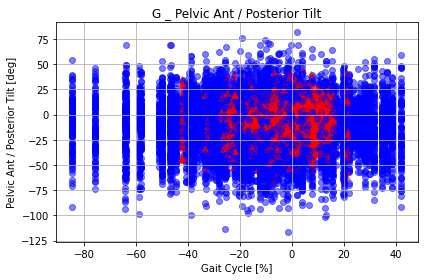

In [72]:
for i in range(1,101):
  plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, i], color='red',  marker='^', alpha=0.5) # jovenes
  plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, i], color='blue', marker='o', alpha=0.5) # viejos

plt.grid(True)
plt.title("G _ Pelvic Ant / Posterior Tilt")
plt.xlabel("Gait Cycle [%]")
plt.ylabel("Pelvic Ant / Posterior Tilt [deg]")
plt.yscale('linear')
plt.xscale('linear')
plt.tight_layout()
plt.show()

In [0]:
from sklearn.decomposition import PCA
#
pca=PCA(n_components=2)
pca.fit(X)
#
transformada=pca.transform(X)

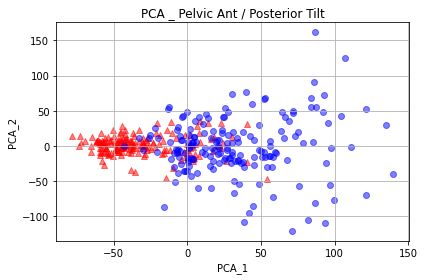

In [75]:
plt.scatter(transformada[Y[:,0] == 0,0],transformada[Y[:,0] == 0,1], color='red',  marker='^', alpha=0.5) 
plt.scatter(transformada[Y[:,0] == 1,0],transformada[Y[:,0] == 1,1], color='blue', marker='o', alpha=0.5) 
plt.grid(True)
plt.title("PCA _ Pelvic Ant / Posterior Tilt")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.yscale('linear')
plt.xscale('linear')
plt.tight_layout()
plt.show()